In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
hist = glob.glob(cnst.lmcs_drive + 'CP_models/MCS_files/MODELS/CP4_box/CP4_allHours_historical_5000km2_-50_WAf_box/*.nc')
fut = glob.glob(cnst.lmcs_drive + 'CP_models/MCS_files/MODELS/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box/*.nc')

In [20]:
hh = xr.open_mfdataset(cnst.lmcs_drive + 'CP_models/MCS_files/MODELS/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box/*.nc', concat_dim='cases', combine='nested')

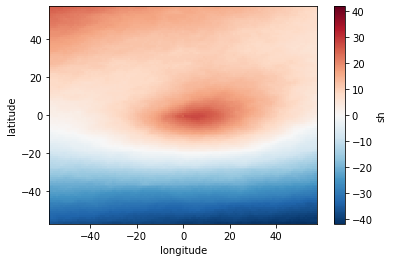

In [21]:
(hh['sh']-hh['sh'].mean()).mean('cases').plot()

In [13]:
kernel_list = np.zeros(hh.shape)
kernel_list.shape

AttributeError: 'Dataset' object has no attribute 'shape'

In [16]:
(115-1)/2

57.0

In [11]:
def cut_kernel(xpos, ypos, arr, date, lon, lat, t, parallax=False, rotate=False):
    
    dist = 70

    kernel = u_arrays.cut_kernel(arr,xpos, ypos,dist)

    kernel3 = kernel - np.nanmean(kernel)

    cnt = np.zeros_like(kernel)
    cnt[np.isfinite(kernel)] = 1

    if kernel.shape != (dist*2+1, dist*2+1):
        return None

    return kernel, kernel3, cnt

In [12]:
cnt = 0
shape = (115,115)
kernel_list = None
kernel3_list = None
cnt_list = None
for hh in hist:
    dbox = xr.open_dataset(hh)
    if np.sum(np.isnan(dbox['u_srfc'].values))/dbox['u_srfc'].shape > 0.25:
    
        print(np.sum(np.isnan(dbox['u_srfc'].values))/dbox['u_srfc'].shape)
        print('> 25% Nans, continue!')
        continue
    
    filt = dbox#.where(dbox['lsRain_noon']<0.005)
    
#     tmin = filt.where(dbox['lw_out_PBLtop']==filt['lw_out_PBLtop'].min(), drop=True)

#     #point = dbox.sel(latitude=tmin.latitude, longitude=tmin.longitude, method='nearest')
#     plat = tmin['latitude'].values
#     plon = tmin['longitude'].values

#     xpos = np.where(filt['longitude'].values == plon)
#     xpos = int(xpos[0])
#     ypos = np.where(filt['latitude'].values == plat)
#     ypos = int(ypos[0])

#     xpos = (shape[0]-1)/2
#     ypos = (shape[0]-1)/2

#     distx=57 # 500km across
#     disty =57# 500 km across
#     try:
#         filt = filt.isel(latitude=slice(ypos-disty,ypos+disty+1), longitude=slice(xpos-distx, xpos+distx+1))
#     except IndexError:
#         continue

#     if (len(filt.latitude) != disty*2+1) | (len(filt.longitude) != distx*2+1):
#         print(filt)
#         continue
#     filt = filt.assign_coords({'longitude': np.arange(distx*-1,distx+1), 'latitude':np.arange(distx*-1,distx+1)})
    
    kernel_list.append(filt)
    kernel3_list.append(filt-filt.mean())
    
    del filt    
    cnt +=1

KeyboardInterrupt: 

In [ ]:
kk = xr.concat(kernel_list, dim='cases')

In [ ]:
(kk.mean('cases')['t_low']-kk.mean('cases')['t_mid']).plot()

In [ ]:
kk2 = xr.concat(kernel3_list, dim='cases')

In [ ]:
kk2.mean('cases')['t2'].plot()

In [ ]:
cnt = 0
futkernel_list = []
futkernel3_list = []
cnt_list = []
for hh in fut:
    dbox = xr.open_dataset(hh)
    if np.sum(np.isnan(dbox['u_srfc'].values)) >10:
    
        print(np.sum(np.isnan(dbox['u_srfc'].values)))
        print('Nans, continue!')
        continue
    
    filt = dbox.where(dbox['lsRain_noon']<0.005)
    
    tmin = filt.where(dbox['lw_out_PBLtop']==filt['lw_out_PBLtop'].min(), drop=True)

    #point = dbox.sel(latitude=tmin.latitude, longitude=tmin.longitude, method='nearest')
    plat = tmin['latitude'].values
    plon = tmin['longitude'].values

    xpos = np.where(filt['longitude'].values == plon)
    xpos = int(xpos[0])
    ypos = np.where(filt['latitude'].values == plat)
    ypos = int(ypos[0])

    distx=15 # 500km across
    disty =15 # 500 km across
    try:
        filt = filt.isel(latitude=slice(ypos-disty,ypos+disty+1), longitude=slice(xpos-distx, xpos+distx+1))
    except IndexError:
        continue

    if (len(filt.latitude) != disty*2+1) | (len(filt.longitude) != distx*2+1):
        print(filt)
        continue
    filt = filt.assign_coords({'longitude': np.arange(distx*-1,distx+1), 'latitude':np.arange(distx*-1,distx+1)})
    
    futkernel_list.append(filt)
    futkernel3_list.append(filt-filt.mean())
    
    del filt    
    cnt +=1

In [ ]:
futkk = xr.concat(futkernel_list, dim='cases')

In [ ]:
futkk

In [ ]:
futkk.mean('cases')['shear'].plot()